# Project: Investigate a Dataset - [No-show appointments](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row (original source on [kaggle](https://www.kaggle.com/joniarroba/noshowappointments)).

* ‘ScheduledDay’ tells us on what day the patient set up their appointment.

* ‘Neighborhood’ indicates the location of the hospital.

* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).

* Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

file = 'noshowappointments-kagglev2-may-2016.csv'
#file = 'tmdb-movies.csv'

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

data = pd.read_csv(file)
data.head()
#display(data.head())

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

* By above step, its clear that there is no null data found.

It can be possible that there can be negative values for age. Hence, checking for those junk values.

In [15]:
# checking for negative age (as directed by the previous reviewer)
sorted(data.Age.unique())


[-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 102,
 115]

Negative value for age is found. Now in my next step I will clean up the junk data found for age.

In [16]:
# cleaning the data , age should always be greater than 0
data = data[data.Age >= 0]

Checking again for negative age values.

In [21]:
sorted(data.Age.unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 102,
 115]

No negative age found.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 - What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [5]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [6]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#data.groupby('Age').sum()
#pd.crosstab(data.Age, data['No-show'])
age_no_show = pd.crosstab(data.Age, data['No-show'])
age_no_show
#pd.crosstab(data.Age, data['No-show']).min()

No-show,No,Yes
Age,,
-1,1,0
0,2900,639
1,1858,415
2,1366,252
3,1236,277
4,1017,282
5,1169,320
6,1205,316
7,1126,301


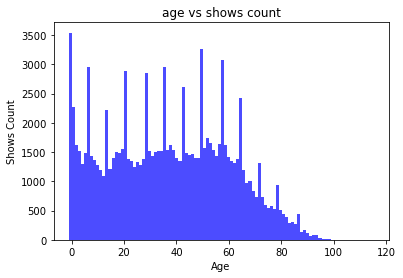

PatientId  AppointmentID  Gender  ScheduledDay  AppointmentDay  \
Age  No-show                                                                   
-1   No               1              1       1             1               1   
 0   No            2900           2900    2900          2900            2900   
     Yes            639            639     639           639             639   
 1   No            1858           1858    1858          1858            1858   
     Yes            415            415     415           415             415   
 2   No            1366           1366    1366          1366            1366   
     Yes            252            252     252           252             252   
 3   No            1236           1236    1236          1236            1236   
     Yes            277            277     277           277             277   
 4   No            1017           1017    1017          1017            1017   
     Yes            282            282     282           282             282   
 5   No            1169           1169    1169          1169            1169   
     Yes            320            320     320           320             320   
 6   No            1205           1205    1205          1205            1205   
     Yes            316            316     316           316             316   
 7   No            1126           1126    1126          1126            1126   
     Yes            301            301     301           301             301   
 8   No            1106           1106    1106          1106            1106   
     Yes            318            318     318           318             318   
 9   No            1008           1008    1008          1008            1008   
     Yes            364            364     364           364             364   
 10  No             970            970     970           970             970   
     Yes            304            304     304           304             304   
 11  No             948            948     948           948             948   
     Yes            247            247     247           247             247   
 12  No             820            820     820           820             820   
     Yes            272            272     272           272             272   
 13  No             800            800     800           800             800   
     Yes            303            303     303           303             303   
 14  No             802            802     802           802             802   
...                 ...            ...     ...           ...             ...   
 86  Yes             42             42      42            42              42   
 87  No             157            157     157           157             157   
     Yes             27             27      27            27              27   
 88  No             114            114     114           114             114   
     Yes             12             12      12            12              12   
 89  No             144            144     144           144             144   
     Yes             29             29      29            29              29   
 90  No              86             86      86            86              86   
     Yes             23             23      23            23              23   
 91  No              53             53      53            53              53   
     Yes             13             13      13            13              13   
 92  No              66             66      66            66              66   
     Yes             20             20      20            20              20   
 93  No              43             43      43            43              43   
     Yes             10             10      10            10              10   
 94  No              27             27      27            27              27   
     Yes              6              6       6             6               6   
 95  No       

In [13]:
#  age vs shows count
figure = plt.figure()
grid = figure.add_subplot(1,1,1)
age = data['Age']
grid.hist(age, 100, color='blue',alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Shows Count')
plt.title('age vs shows count')
plt.show()
data.groupby(['Age','No-show']).count()

In [8]:
# count of visitors vs gender
pd.crosstab(data['No-show'],data['Gender'])


Gender,F,M
No-show,,
No,57246,30962
Yes,14594,7725


By above analysis based on gender, 
* men visit less than women to doctors.

In [9]:
# count of visitors vs SMS_received
pd.crosstab(data['No-show'],data['SMS_received'])

SMS_received,0,1
No-show,,
No,62510,25698
Yes,12535,9784


By above analysis based on SMS_received, 

* patients who have received sms have shown heiger chances of no-show for appointment.

In [10]:
# count of visitors vs Alcoholism
pd.crosstab(data['No-show'],data['Alcoholism'])

Alcoholism,0,1
No-show,,
No,85525,2683
Yes,21642,677



By above analysis based on Alcoholism, 

* alcoholic patients have less no show percentage


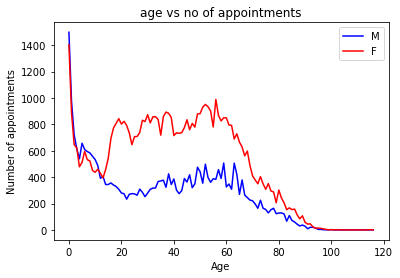

In [20]:
# by gender , the no of visits
newdata = data[data['No-show'] == 'No']
age_df = pd.DataFrame()
age_df['Age'] = range(newdata['Age'].max() + 2)
men = age_df.Age.apply(lambda x: len(newdata[(newdata.Age == x) & (newdata.Gender == 'M')]))
women = age_df.Age.apply(lambda x: len(newdata[(newdata.Age == x) & (newdata.Gender == 'F')]))
plt.plot(range(newdata['Age'].max() + 2),men, 'b')
plt.plot(range(newdata['Age'].max() + 2),women, color = 'r')
plt.legend(['M','F'])
plt.xlabel('Age')
plt.ylabel('Number of appointments')
plt.title('age vs no of appointments')
plt.show()


In the analysis, we can canclude that female patient's age from 15 to 65 visits more to doctors.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

## Question
### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

#### According to the analysis I have done, it seems like patients *age* and *sex* is the most promising factor by which we can come on to a conclusion. Womens visit doctors more than man and Age group 15 to 65 have more chances of visiting doctors than any other age group. 

#### In the limitation side the data is little limited and it can have helped some more in drawing conclusion once it had some more data like:
 * time of appointment - by this way we can come up with more precised prediction
 * type of disease (severe/ non severe) - 
 * weather conditions 
 * season (summer / rainy / cold)

In [12]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0